In [23]:
#Program to generate the Bell state phi+
from qiskit import *

In [24]:
qc=QuantumCircuit() #Creating an empty quantum circuit named qc
qr=QuantumRegister(2,'qreg') #Creating a quantum register of 2 qubits with the display name as qreg. 

In [25]:
qc.add_register(qr)  #Adding the quantum register to the circuit using the add_register() method
qc.qregs  #Checking whether qr was added

[QuantumRegister(2, 'qreg')]

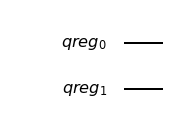

In [26]:
qc.draw(output='mpl')

In [27]:
#Applying a hadamard gate to the first qubit, qubits of qr are addressed as qr[0] and qr[1]
qc.h(qr[0]); #This takes the first qubit from ket(0) to ket(+)


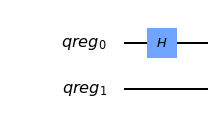

In [28]:
qc.draw(output='mpl')

In [29]:
#Applying a cnot gate with qr[0] as the control qubit and qr[1] as the target qubit
qc.cx(qr[0],qr[1])

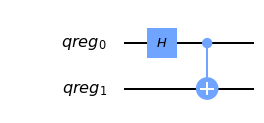

In [30]:
qc.draw(output='mpl')

In [31]:
#Simulating the statevector of the two qubits
backend_req=Aer.get_backend('statevector_simulator') #to set up the required backend on which the quantum program runs.

#Aer.backends() #list of all possible simulators in Aer

In [32]:
#Executing the circuit
#execute() performs the required task, needs the circuit and backend as inputs
job_req=execute(qc,backend_req)

In [33]:
#Obtaining/Extracting the results
#print(type(job_req))
req_statevector=job_req.result().get_statevector()
for amplitude in req_statevector:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


In [34]:
cr=ClassicalRegister(2,'creg')  #Creating a classical register of 2 bits with the name as creg to store the measurement results
qc.add_register(cr)

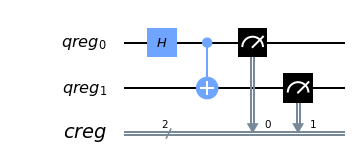

In [35]:
#Performing measurement on both the qubits
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

In [41]:
#Executing the circuit on a simulated quantum device 
backend_sim_qd=Aer.get_backend('qasm_simulator')
job_sim_qd=execute(qc,backend_sim_qd,shots=8192) #shots=no. of times the circuit is run

In [42]:
#Obtaining the results
hist=job_sim_qd.result().get_counts() #gives a dictionary with outcome as key and frequency as value
print(hist)

{'00': 4056, '11': 4136}


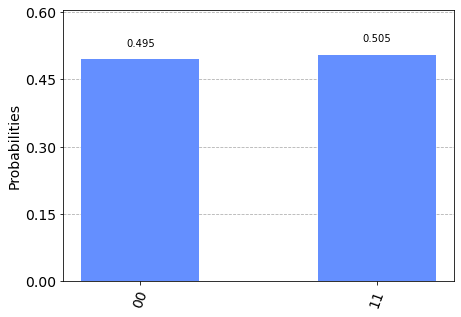

In [44]:
from qiskit.visualization import plot_histogram
plot_histogram(hist)  #to  plot our dictionary of measurement results as a histogram